In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sts
import statistics

In [75]:
import seaborn as sns
from scipy.stats import kurtosis, skew

1. Загрузить файл auto.csv 

In [50]:
df=pd.read_csv('auto.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-nu

2. Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение) 

In [52]:
# Среднее
df.describe().loc['mean':'mean',:]

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.04878,5131.463415,25.219512,30.75122,13312.712195


In [53]:
# Медиана
pd.DataFrame(df.median()).T.rename(index={0: 'median'})

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
median,1.0,122.0,97.0,173.2,65.5,54.1,2414.0,120.0,3.31,3.29,9.0,95.0,5200.0,24.0,30.0,10295.0


In [60]:
# Мода (в поле engine-size есть 2 числа, которые встречаются одинаково часто 92 и 122)
df.mode().rename(index={0: 'mode1', 1: 'mode2'})

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
mode1,0.0,161.0,toyota,gas,std,four,sedan,fwd,front,94.5,...,92,mpfi,3.62,3.4,9.0,68.0,5500.0,31.0,25.0,6785.0
mode2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Минимум и максимум
df.describe().loc[['min','max'],:]

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
min,-2.0,65.0,86.6,141.1,60.3,47.8,1488.0,61.0,2.54,2.07,7.0,48.0,4150.0,13.0,16.0,5118.0
max,3.0,256.0,120.9,208.1,72.3,59.8,4066.0,326.0,3.94,4.17,23.0,288.0,6600.0,49.0,54.0,45400.0


In [64]:
# Стандартное отклонение
df.describe().loc['std':'std',:]

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
std,1.245307,35.4384,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.97204,43.468803,480.93333,6.542142,6.886443,8102.472461


3. Рассчитать и визуализировать корреляционную матрицу для переменных 

In [65]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1,0.5,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.16,-0.02,-0.18,0.07,0.27,-0.036,0.035,-0.08
normalized-losses,0.5,1,-0.03,0.051,0.12,-0.33,0.15,0.17,0.014,0.039,-0.15,0.27,0.23,-0.29,-0.26,0.2
wheel-base,-0.53,-0.03,1,0.87,0.8,0.59,0.78,0.57,0.5,0.16,0.25,0.3,-0.36,-0.47,-0.54,0.57
length,-0.36,0.051,0.87,1,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.52,-0.28,-0.67,-0.7,0.68
width,-0.23,0.12,0.8,0.84,1,0.28,0.87,0.74,0.56,0.18,0.18,0.6,-0.21,-0.64,-0.68,0.76
height,-0.54,-0.33,0.59,0.49,0.28,1,0.3,0.067,0.2,-0.044,0.26,-0.11,-0.32,-0.049,-0.11,0.11
curb-weight,-0.23,0.15,0.78,0.88,0.87,0.3,1,0.85,0.65,0.17,0.15,0.68,-0.26,-0.76,-0.8,0.84
engine-size,-0.11,0.17,0.57,0.68,0.74,0.067,0.85,1,0.6,0.21,0.029,0.74,-0.24,-0.65,-0.68,0.87
bore,-0.16,0.014,0.5,0.61,0.56,0.2,0.65,0.6,1,-0.049,0.0085,0.54,-0.28,-0.56,-0.56,0.55
stroke,-0.02,0.039,0.16,0.13,0.18,-0.044,0.17,0.21,-0.049,1,0.19,0.16,-0.052,-0.034,-0.037,0.08


4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

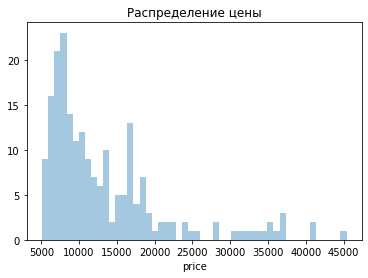

In [72]:
sns.distplot(df['price'], 50, kde = False)
plt.title('Распределение цены')
plt.show()

In [76]:
skew(df['price'])

1.7534486514523662

In [78]:
kurtosis(df['price'])

2.848082544390688

5. Визуализировать несколько взаимосвязей между переменными 

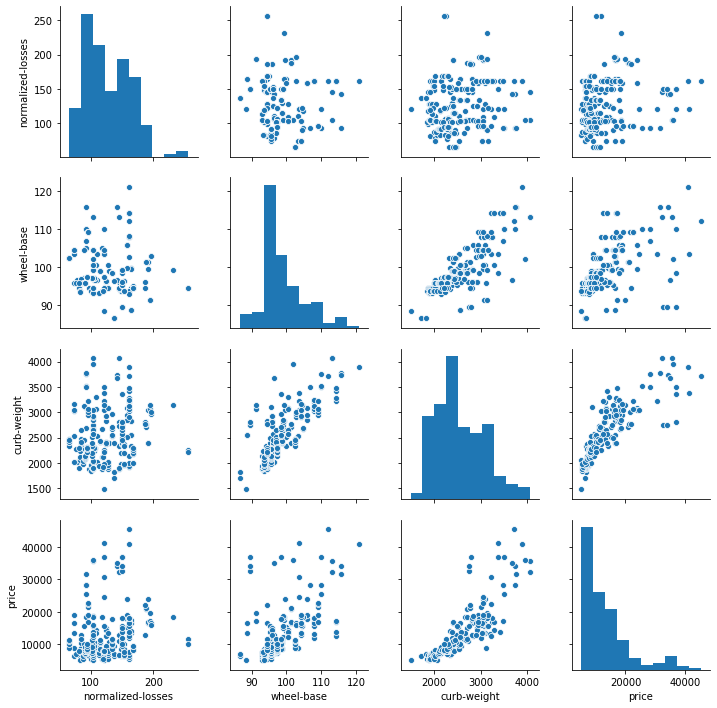

In [83]:
sns.pairplot(df[['normalized-losses','wheel-base','curb-weight', 'price']])

6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

In [ ]:
# Возьмем выборку symboling = 0 по параметру "price"
# Нулевая гипотеза - среднее значение выборки равно среднему значению генеральной совокупности(всех значений symboling).

In [85]:
df_0 = df[df['symboling']==0]['price']
sts.ttest_1samp(df_0, df['price'].mean())

Ttest_1sampResult(statistic=1.0294578568641766, pvalue=0.3070225533287134)

In [89]:
len(df_0), len(df)

(67, 205)

In [88]:
# p-value равно 0.30, что больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу

7. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте. 